# Linear Regression Indicator

https://commodity.com/technical-analysis/lin-reg-line/

https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/linear-regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol1 = 'hdfc.ns'
symbol2 = '^nsei'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df1 = yf.download(symbol1,start,end)
df2 = yf.download(symbol2,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# View Columns
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,2418.00,2438.500000,2409.000000,2433.949951,2329.374512,945874
2020-01-02 00:00:00+05:30,2430.00,2472.750000,2422.000000,2466.399902,2360.430420,1701396
2020-01-03 00:00:00+05:30,2455.00,2466.399902,2441.800049,2454.449951,2348.993652,1963923
2020-01-06 00:00:00+05:30,2428.00,2445.000000,2371.399902,2384.100098,2281.666504,2656731
2020-01-07 00:00:00+05:30,2401.25,2428.800049,2380.199951,2415.050049,2311.286621,3771992


In [4]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
2020-01-02 00:00:00+05:30,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2020-01-03 00:00:00+05:30,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
2020-01-06 00:00:00+05:30,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
2020-01-07 00:00:00+05:30,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


In [5]:
avg1 = df1['Adj Close'].mean()
avg2 = df2['Adj Close'].mean()
df1['AVGS1_S1'] = avg1 - df1['Adj Close']
df1['AVGS2_S2'] = avg2 - df2['Adj Close']
df1['Average_SQ'] = df1['AVGS1_S1']**2
df1['AVG_AVG'] = df1['AVGS1_S1']*df1['AVGS2_S2']

In [6]:
df1.head(20)

,Open,High,Low,Close,Adj Close,Volume,AVGS1_S1,AVGS2_S2,Average_SQ,AVG_AVG
Date,,,,,,,,,,
2020-01-01 00:00:00+05:30,2418.000000,2438.500000,2409.000000,2433.949951,2329.374512,945874,-29.438367,2616.096445,866.617427,-77013.606180
2020-01-02 00:00:00+05:30,2430.000000,2472.750000,2422.000000,2466.399902,2360.430420,1701396,-60.494275,2516.396250,3659.557282,-152227.566226
2020-01-03 00:00:00+05:30,2455.000000,2466.399902,2441.800049,2454.449951,2348.993652,1963923,-49.057507,2571.946055,2406.639014,-126173.262124
2020-01-06 00:00:00+05:30,2428.000000,2445.000000,2371.399902,2384.100098,2281.666504,2656731,18.269641,2805.546641,333.779791,51256.330573
2020-01-07 00:00:00+05:30,2401.250000,2428.800049,2380.199951,2415.050049,2311.286621,3771992,-11.350476,2745.646250,128.833305,-31164.391755
2020-01-08 00:00:00+05:30,2387.000000,2413.000000,2385.500000,2406.149902,2302.768799,2147334,-2.832654,2773.246836,8.023927,-7855.647895
2020-01-09 00:00:00+05:30,2430.000000,2462.699951,2421.149902,2457.399902,2351.816650,3247323,-51.880505,2582.696055,2691.586826,-133991.576244
2020-01-10 00:00:00+05:30,2465.000000,2477.649902,2440.300049,2457.550049,2351.960693,2082060,-52.024548,2541.796641,2706.553618,-132235.821912
2020-01-13 00:00:00+05:30,2461.100098,2471.050049,2441.000000,2462.550049,2356.746094,3401754,-56.809949,2469.046641,3227.370262,-140266.412788


In [7]:
sum_sq = df1['Average_SQ'].sum()
sum_avg = df1['AVG_AVG'].sum()
slope = sum_avg/sum_sq
intercept = avg2-(slope*avg1)

In [8]:
df1['Linear_Regression'] = intercept + slope*(df1['Adj Close'])

In [9]:
df1 = df1.drop(['AVGS1_S1', 'AVGS2_S2', 'Average_SQ', 'AVG_AVG'], axis=1)
df1.head()

,Open,High,Low,Close,Adj Close,Volume,Linear_Regression
Date,,,,,,,
2020-01-01 00:00:00+05:30,2418.00,2438.500000,2409.000000,2433.949951,2329.374512,945874,14999.551637
2020-01-02 00:00:00+05:30,2430.00,2472.750000,2422.000000,2466.399902,2360.430420,1701396,15211.548657
2020-01-03 00:00:00+05:30,2455.00,2466.399902,2441.800049,2454.449951,2348.993652,1963923,15133.477823
2020-01-06 00:00:00+05:30,2428.00,2445.000000,2371.399902,2384.100098,2281.666504,2656731,14673.882350
2020-01-07 00:00:00+05:30,2401.25,2428.800049,2380.199951,2415.050049,2311.286621,3771992,14876.078226


Text(0, 0.5, 'Volume')

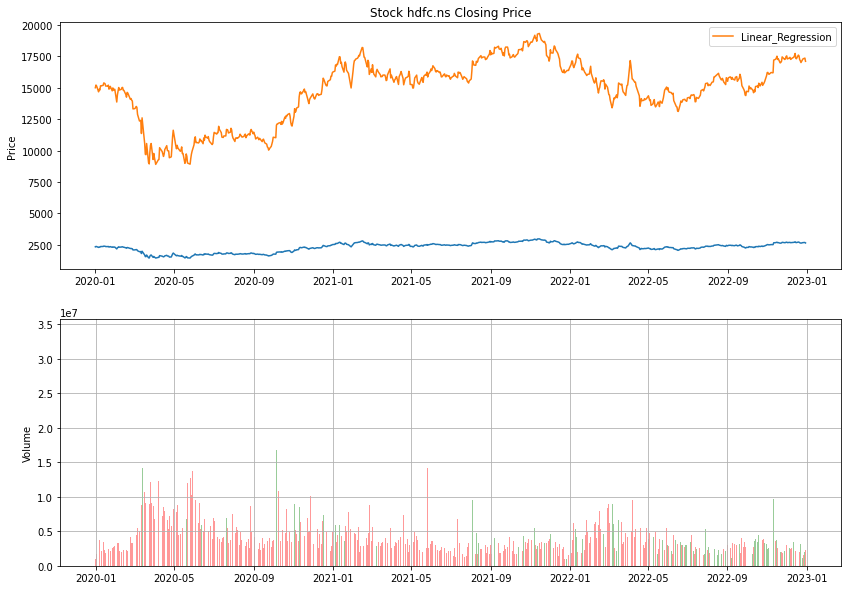

In [10]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df1['Adj Close'])
ax1.plot(df1['Linear_Regression'], label='Linear_Regression')
ax1.set_title('Stock '+ symbol1 +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
df1['VolumePositive'] = df1['Open'] < df1['Adj Close']
colors = df1.VolumePositive.map({True: 'g', False: 'r'})
ax2.bar(df1.index, df1['Volume'], color=colors, alpha=0.4)
ax2.grid()
ax2.set_ylabel('Volume')

## Candlestick with Linear Regression

In [11]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df1.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Linear_Regression,VolumePositive
0,18261.770833,2418.00,2438.500000,2409.000000,2433.949951,2329.374512,945874,14999.551637,False
1,18262.770833,2430.00,2472.750000,2422.000000,2466.399902,2360.430420,1701396,15211.548657,False
2,18263.770833,2455.00,2466.399902,2441.800049,2454.449951,2348.993652,1963923,15133.477823,False
3,18266.770833,2428.00,2445.000000,2371.399902,2384.100098,2281.666504,2656731,14673.882350,False
4,18267.770833,2401.25,2428.800049,2380.199951,2415.050049,2311.286621,3771992,14876.078226,False


Text(0, 0.5, 'Volume')

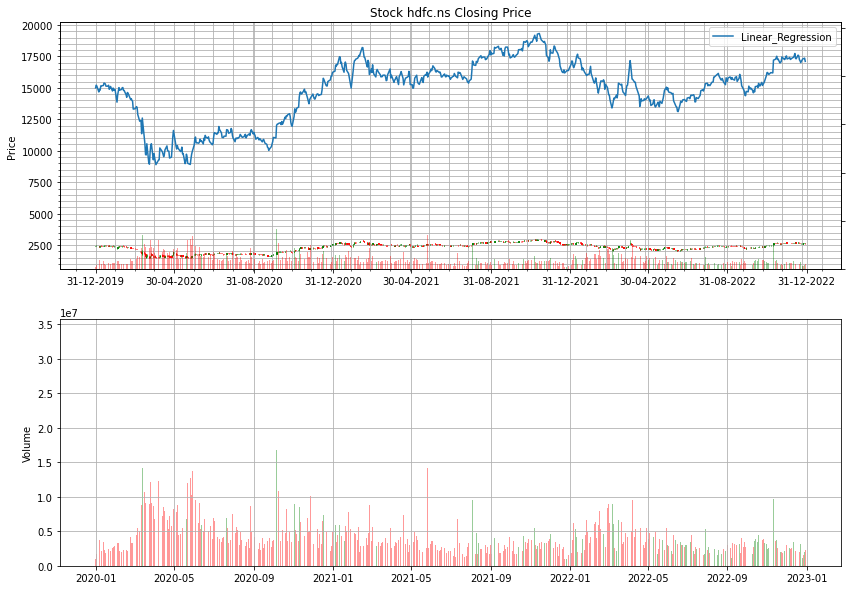

In [13]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df1['Linear_Regression'], label='Linear_Regression')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df1.Volume.max())
ax1.set_title('Stock '+ symbol1 +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
df1['VolumePositive'] = df1['Open'] < df1['Adj Close']
colors = df1.VolumePositive.map({True: 'g', False: 'r'})
ax2.bar(df1.index, df1['Volume'], color=colors, alpha=0.4)
ax2.grid()
ax2.set_ylabel('Volume')